In [1]:
import re, os
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import basename, join
from sklearn.preprocessing import MinMaxScaler

# Importing Data & Preprocessing

In [170]:
path = 'Datasets/NASA C-MAPSS/'
text_files = [f for f in os.listdir(path) if f.endswith('.txt') and not f.startswith('r')]
dataframe = [os.path.splitext(f)[0] for f in text_files]
sensor_columns = ["sensor {}".format(s) for s in range(1, 22)]
info_columns = ['dataset_id', 'unit_id', 'cycle', 'setting 1', 'setting 2', 'setting 3']
label_columns = ['dataset_id', 'unit_id', 'rul']
settings = ['setting 1', 'setting 2', 'setting 3']


test_data = []
train_data = []
RUL_data = []

In [171]:
def get_RUL(dataframe, Lifetime):
    return Lifetime.loc[(dataframe['dataset_id'], dataframe['unit_id'])] - dataframe['cycle']
def RUL_by_parts(df, RUL=130):
    if df['RUL'] > RUL: return RUL
    if df['RUL'] <= RUL: return df['RUL']
    

In [172]:
for file in text_files:
    print(file)

    if re.match('RUL*', file):
        subset_df = pd.read_csv(path + file, delimiter=r"\s+", header=None)
        unit_id = range(1, subset_df.shape[0] + 1)
        subset_df.insert(0, 'unit_id', unit_id)
        dataset_id = basename(file).split("_")[1][:5]
        subset_df.insert(0, 'dataset_id', dataset_id)
        RUL_data.append(subset_df)

    if re.match('test*', file):
        subset_df = pd.read_csv(path + file, delimiter=r"\s+", header=None, usecols=range(26))
        dataset_id = basename(file).split("_")[1][:5]
        subset_df.insert(0, 'dataset_id', dataset_id)
        test_data.append(subset_df)

    if re.match('train*', file):
        subset_df = pd.read_csv(path + file, delimiter=r"\s+", header=None, usecols=range(26))
        dataset_id = basename(file).split("_")[1][:5]
        subset_df.insert(0, 'dataset_id', dataset_id)
        train_data.append(subset_df)

train_FD004.txt
RUL_FD001.txt
RUL_FD002.txt
test_FD002.txt
RUL_FD004.txt
train_FD003.txt
train_FD002.txt
RUL_FD003.txt
test_FD003.txt
test_FD001.txt
train_FD001.txt
test_FD004.txt


In [173]:
df_train = pd.concat(train_data, ignore_index=True)
df_train.columns = info_columns + sensor_columns
df_train.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)

df_test = pd.concat(test_data, ignore_index=True)
df_test.columns = info_columns + sensor_columns
df_test.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)

df_RUL = pd.concat(RUL_data, ignore_index=True)
df_RUL.columns = label_columns
df_RUL.sort_values(by=['dataset_id', 'unit_id'], inplace=True)

In [136]:
df_train

,dataset_id,unit_id,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
139728,FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190
139729,FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.00,39.00,23.4236
139730,FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.00,38.95,23.3442
139731,FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.00,38.88,23.3739
139732,FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.00,38.90,23.4044
139733,FD001,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.00,38.98,23.3669
139734,FD001,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.00,39.10,23.3774
139735,FD001,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.00,38.97,23.3106
139736,FD001,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.00,39.05,23.4066
139737,FD001,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.00,38.95,23.4694


In [174]:
RUL_train = df_train.groupby(['dataset_id', 'unit_id'])['cycle'].max()

RUL_test = df_test.groupby(['dataset_id', 'unit_id'])['cycle'].max() + df_RUL.groupby(['dataset_id', 'unit_id'])[
'rul'].max()

df_train['RUL'] = df_train.apply(lambda r: get_RUL(r, RUL_train), axis=1)
df_train['RUL'] = df_train.apply(lambda r: RUL_by_parts(r, 130), axis=1)

df_test['RUL'] = df_test.apply(lambda r: get_RUL(r, RUL_test), axis=1)
df_test['RUL'] = df_test.apply(lambda r: RUL_by_parts(r, 130), axis=1)

df_train.set_index(['dataset_id', 'unit_id'], inplace=True)
df_test.set_index(['dataset_id', 'unit_id'], inplace=True)

In [175]:
# remove constant sensors and settings and apply minmax scaler
trainsets = dict.fromkeys(["FD001","FD002","FD003","FD004"])
testsets= dict.fromkeys(["FD001","FD002","FD003","FD004"])

scaler = MinMaxScaler(feature_range=(-1,1))

for i in range(4):
    trainsets["FD00"+str(i+1)] = df_train.loc["FD00"+str(i+1)][["cycle","sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]]
    trainsets["FD00"+str(i+1)][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21"]]=scaler.fit_transform(df_train.loc["FD00"+str(i+1)][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21"]])
    testsets["FD00"+str(i+1)] = df_test.loc["FD00"+str(i+1)][["cycle","sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]]
    testsets["FD00"+str(i+1)][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21"]]=scaler.fit_transform(testsets["FD00"+str(i+1)][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21"]])

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversion

In [23]:
pkl.dump(trainsets, open("Datasets/NASA C-MAPSS/trainsets.p","wb"))
pkl.dump(testsets, open("Datasets/NASA C-MAPSS/testsets.p","wb"))

# Training

In [3]:
import re, os
import numpy as np
import pandas as pd
import pickle as pkl
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def rwindows(a, window): 
    # retourne une fenếtre temporelle de taille window d'un tableau a
    if a.ndim == 1:
        a = a.reshape(-1, 1)
    shape = a.shape[0] - window + 1, window, a.shape[-1]
    strides = (a.strides[0],) + a.strides
    windows = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    return np.squeeze(windows)

In [5]:
class Dataset_Nasa(torch.utils.data.Dataset):
  def __init__(self, dataset, transform=None, train = True, window = 30):
        #Initialization
        df = trainsets["FD00"+str(dataset)] if train else testsets["FD00"+str(dataset)]
        #remove lines whose number of cycles is below the window size
        df = df.drop(list(set(df[df["cycle"] > window].index.tolist()) ^ set(range(1,df.index.tolist()[-1]+1))), axis = 0)
        if not train:
            # take only the temporal window on last cycles for test datapoints
            df_last = [df.loc[i].set_index('cycle').iloc[(-window-1):-1] for i in list(set(df.index.tolist()))]
            df_window = np.vstack([rwindows(a[["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]].values,window) for a in df_last]).reshape((-1,window,15))
        else:
            df_window = np.vstack([rwindows(df.loc[i][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]].values,window) for i in list(set(df.index))])
        
        #remove lines whose cycle time is less than window-size
        
        
        X = df_window[:,:,:14]
        Y = df_window[:,29,14]
        
        
        self.X = X.reshape((X.shape[0],1,window,14))
        self.Y = Y
        self.transform = transform
        self.train = train
        
  def __len__(self):
        'Denotes the total number of samples'
        return self.X.shape[0]

  def __getitem__(self, index):
        'Generates one sample of data'
        #print(self.Y[index])
        return self.X[index], self.Y[index]

In [6]:
class CNN(nn.Module):
    def __init__(self, window_size =9, dropout_ratio = 0.5, initialization='xavier', hidden_neurons=100, activation = 'tanh'):
        
        super().__init__()
        
        #self.activ = torch.relu if activation == "relu" else torch.tanh
        init = nn.init.kaiming_normal_ if initialization=="kaiming" else nn.init.xavier_normal_
        
        self.conv1 = nn.Conv2d(1,10,kernel_size=(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh1 = nn.Tanh()
        init(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0)
        
        self.conv2 = nn.Conv2d(10,10,kernel_size=(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh2 = nn.Tanh()
        init(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0)
        
        self.conv3 = nn.Conv2d(10,10,(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh3 = nn.Tanh()
        init(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.conv4 = nn.Conv2d(10,10,(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh4 = nn.Tanh()
        init(self.conv4.weight)
        nn.init.constant_(self.conv4.bias, 0)
        
        self.conv5 = nn.Conv2d(10,1,(3,1),padding = (1,0))
        self.tanh5 = nn.Tanh()
        init(self.conv5.weight)
        nn.init.constant_(self.conv5.bias, 0)
        
        self.dropout = nn.Dropout(p=dropout_ratio)
        
        self.fc1 = nn.Linear(in_features = 420, out_features = hidden_neurons)
        self.tanh_fc1 = nn.Tanh()
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0)
        
        self.fc2 = nn.Linear(in_features = hidden_neurons, out_features = 1)
        #self.tanh_fc2 = nn.Tanh()
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0)
        
    def forward(self,x):
        tanh1 = self.tanh1(self.conv1(x))
        tanh2 = self.tanh2(self.conv2(tanh1))
        tanh3 = self.tanh3(self.conv3(tanh2))
        tanh4 = self.tanh4(self.conv4(tanh3))
        tanh5 = self.tanh5(self.conv5(tanh4))
        dropout1 = self.dropout(tanh5)
        x_reshape = dropout1.view(-1,30*14)
        tanh6 = self.tanh_fc1(self.fc1(x_reshape))
        predict = self.fc2(tanh6)
        #print(predict)
        return predict

In [7]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y))
        return loss

In [16]:
def check_accuracy_part34(loader, model, device = torch.device('cpu'), print_graph = False):
    MSE = nn.MSELoss()
    dtype = torch.float32
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    model.eval()  # set model to evaluation mode
    loss = 0
    with torch.no_grad():
        for t, (x,y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            score = model(x)
            loss += MSE(score,y.to(device=device, dtype=dtype))
        loss = np.sqrt(loss/(t+1))
        print('RMSE : (%.2f)' % (loss))
        if print_graph:
            plt.plot(np.array(score))
            plt.plot(np.array(y))
            plt.show()
        #print('score : (%.2f) , target : (%.2f)' %(score, y))

In [18]:
def train_model(model, optimizer,loader_train, loader_val = None, epochs = 1,USE_GPU = True,print_every = 10):
    
    if USE_GPU and torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
    model = model.to(device = device)
    hold_loss = []
    RMSE = RMSELoss()
    MSE = nn.MSELoss()
    
    dtype = torch.float32 # we will be using float throughout this tutorial
    
    weight1 = []
    weight2 = []
    weight3 = []
    weight4 = []
    weight5 = []
    weightfc1 = []
    weightfc2 = []
    
    
    for e,epoch in enumerate(range(epochs)):
        cum_loss = 0
       # if e%10 == 0 and e>0:
        #    for param_group in optimizer.param_groups:
         #       param_group['lr']*=0.1
        print('Epoch %d,    lr %f' % (e,optimizer.param_groups[0]['lr']))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=dtype)
            optimizer.zero_grad()            
            scores = model(x)
            loss = RMSE(scores, y)
            cum_loss += loss.data
            loss.backward()
            optimizer.step()
            weight1.append(model.conv1.weight)
            weight2.append(model.conv2.weight)
            weight3.append(model.conv3.weight)
            weight4.append(model.conv4.weight)
            weight5.append(model.conv5.weight)
            weightfc1.append(model.fc1.weight)
            weightfc2.append(model.fc2.weight)
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss))
                if loader_val:
                    check_accuracy_part34(loader_val, model, device)
                print()
                
        hold_loss.append(cum_loss/(t+1))
    if loader_val:
        check_accuracy_part34(loader_val, model, print_graph=False)
    plt.figure()
    plt.plot(np.array(hold_loss))
    return [weight1,weight2,weight3,weight4,weight5,weightfc1,weightfc2]

In [10]:
def get_train_valid_loader(data = 1, batch_size = 512, valid_size = 0.05, shuffle = True, seed = 42):

    trainset = Dataset_Nasa(dataset = data, train = True)
    valset = Dataset_Nasa(dataset = data, train = True)
    
    num_train = len(trainset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))    
    
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    
    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = sampler.SubsetRandomSampler(train_idx)
    valid_sampler = sampler.SubsetRandomSampler(valid_idx)
    
    loader_train = DataLoader(trainset, batch_size=batch_size, sampler = train_sampler)
    loader_val = DataLoader(valset, batch_size=batch_size, sampler = valid_sampler)
    #return loader_train
    return (loader_train, loader_val)

Epoch 0,    lr 0.001000
Iteration 0, loss = 2621917184.0000
Checking accuracy on validation set
RMSE : (46840.88)

Iteration 10, loss = 2235426816.0000
Checking accuracy on validation set
RMSE : (42781.89)

Iteration 20, loss = 2176295680.0000
Checking accuracy on validation set
RMSE : (41873.10)

Iteration 30, loss = 2046904832.0000
Checking accuracy on validation set
RMSE : (41438.30)

Iteration 40, loss = 2024199040.0000
Checking accuracy on validation set
RMSE : (40994.37)

Iteration 50, loss = 1887526016.0000
Checking accuracy on validation set
RMSE : (40491.62)

Iteration 60, loss = 2014121600.0000
Checking accuracy on validation set
RMSE : (39975.30)

Iteration 70, loss = 1873627776.0000
Checking accuracy on validation set
RMSE : (39601.82)

Iteration 80, loss = 1893576704.0000
Checking accuracy on validation set
RMSE : (39186.12)

Iteration 90, loss = 1807345280.0000
Checking accuracy on validation set
RMSE : (38823.84)

Iteration 100, loss = 115504552.0000
Checking accuracy on

RMSE : (22482.78)

Epoch 8,    lr 0.001000
Iteration 0, loss = 628429056.0000
Checking accuracy on validation set
RMSE : (22465.84)

Iteration 10, loss = 595227072.0000
Checking accuracy on validation set
RMSE : (22378.05)

Iteration 20, loss = 599850048.0000
Checking accuracy on validation set
RMSE : (22347.24)

Iteration 30, loss = 543698752.0000
Checking accuracy on validation set
RMSE : (22233.46)

Iteration 40, loss = 575655424.0000
Checking accuracy on validation set
RMSE : (22204.49)

Iteration 50, loss = 566281344.0000
Checking accuracy on validation set
RMSE : (22095.58)

Iteration 60, loss = 572626880.0000
Checking accuracy on validation set
RMSE : (22019.09)

Iteration 70, loss = 588646592.0000
Checking accuracy on validation set
RMSE : (21962.63)

Iteration 80, loss = 576334080.0000
Checking accuracy on validation set
RMSE : (21914.47)

Iteration 90, loss = 547237760.0000
Checking accuracy on validation set
RMSE : (21854.11)

Iteration 100, loss = 35139900.0000
Checking acc

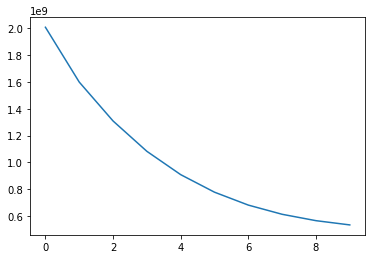

In [11]:
trainsets = pkl.load(open("Datasets/NASA C-MAPSS/trainsets.p","rb"))
testsets = pkl.load(open("Datasets/NASA C-MAPSS/testsets.p","rb"))

train, val = get_train_valid_loader(data = 4)
model = CNN()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model,optimizer, train, loader_val = val, epochs = 10)

Epoch 0,    lr 0.001000
Iteration 0, loss = 99.2094
Checking accuracy on validation set
RMSE : (99.81)

Iteration 10, loss = 92.6943
Checking accuracy on validation set
RMSE : (90.13)

Iteration 20, loss = 89.4393
Checking accuracy on validation set
RMSE : (88.05)

Iteration 30, loss = 87.4111
Checking accuracy on validation set
RMSE : (86.20)

Iteration 40, loss = 85.3738
Checking accuracy on validation set
RMSE : (86.69)

Iteration 50, loss = 87.0013
Checking accuracy on validation set
RMSE : (85.37)

Iteration 60, loss = 84.1818
Checking accuracy on validation set
RMSE : (84.15)

Iteration 70, loss = 82.0285
Checking accuracy on validation set
RMSE : (82.83)

Iteration 80, loss = 83.2057
Checking accuracy on validation set
RMSE : (81.81)

Iteration 90, loss = 83.1690
Checking accuracy on validation set
RMSE : (80.93)

Iteration 100, loss = 85.8045
Checking accuracy on validation set
RMSE : (79.90)

Epoch 1,    lr 0.001000
Iteration 0, loss = 82.1261
Checking accuracy on validation s

RMSE : (44.65)

Epoch 9,    lr 0.001000
Iteration 0, loss = 44.8650
Checking accuracy on validation set
RMSE : (44.36)

Iteration 10, loss = 43.4829
Checking accuracy on validation set
RMSE : (44.29)

Iteration 20, loss = 43.5290
Checking accuracy on validation set
RMSE : (44.59)

Iteration 30, loss = 43.4672
Checking accuracy on validation set
RMSE : (44.01)

Iteration 40, loss = 44.2153
Checking accuracy on validation set
RMSE : (44.44)

Iteration 50, loss = 43.4416
Checking accuracy on validation set
RMSE : (44.40)

Iteration 60, loss = 44.1848
Checking accuracy on validation set
RMSE : (44.49)

Iteration 70, loss = 43.7748
Checking accuracy on validation set
RMSE : (44.27)

Iteration 80, loss = 44.2889
Checking accuracy on validation set
RMSE : (44.17)

Iteration 90, loss = 43.0968
Checking accuracy on validation set
RMSE : (44.66)

Iteration 100, loss = 44.5260
Checking accuracy on validation set
RMSE : (44.15)

Checking accuracy on validation set
RMSE : (44.19)


KeyboardInterrupt: 

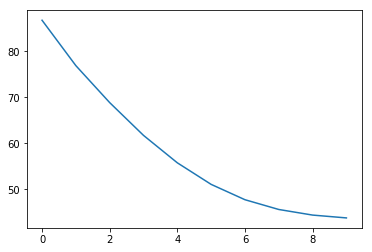

In [19]:
model2 = CNN(activation='relu')
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)

train_model(model2,optimizer2, train, loader_val = val, epochs = 10)

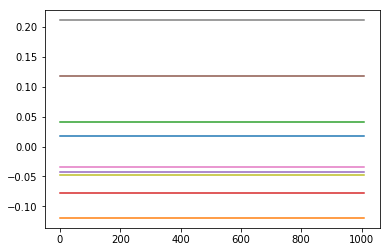

In [21]:
weight1 = w[0]
weight1_1 = [weight1[i][0].data.numpy()[0].squeeze() for i in range(len(weight1))]
for i in range(9):
    plt.plot([weight1_1[j][i] for j in range(len(weight1_1))])
plt.show()

In [83]:
weight1_1[0]

array([ 0.15968356, -0.07980246,  0.26299703,  0.00033664, -0.10420733,
       -0.00346619, -0.17257409, -0.19340606, -0.18334131], dtype=float32)

In [63]:
[weight1_1[j][0] for j in range(len(weight1_1))]

array([[ 0.15968356],
       [-0.07980246],
       [ 0.26299703],
       [ 0.00033664],
       [-0.10420733],
       [-0.00346619],
       [-0.17257409],
       [-0.19340606],
       [-0.18334131]], dtype=float32)

In [146]:
trainset = Dataset_Nasa(dataset=4, train = True)
loader_train = DataLoader(trainset, batch_size = 512)
model = CNN(activation='relu', hidden_neurons=100)
model2 = CNN(activation='tanh', hidden_neurons=100)
learning_rate = 1e-3
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
train_model(model,optimizer, loader_train, epochs = 10)
train_model(model2,optimizer2, loader_train, epochs = 10)

Epoch 0,    lr 0.001000
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9846153846153847
0.9692307692307693
0.953846153846154
0.9384615384615387
0.9230769230769231
0.9076923076923078
0.8923076923076925
0.8769230769230769
0.8615384615384616
0.8461538461538463
0.8307692307692309
0.8153846153846156
0.8
0.7846153846153847
0.7692307692307694
0.7538461538461538
0.7384615384615385
0.7230769230769232
0.

Iteration 0, loss = 491.0699

-0.24615384615384617
-0.2615384615384615
-0.2769230769230768
-0.29230769230769227
-0.3076923076923077
-0.32307692307692304
-0.33846153846153837
-0.3538461538461538
-0.36923076923076925
-0.3846153846153846
-0.3999999999999999
-0.41538461538461535
-0.4307692307692308
-0.4461538461538461
-0.46153846153846145
-0.4769230769230769
-0.49230769230769234
-0.5076923076923077
-0.523076923076923
-0.5384615384615384
-0.5538461538461539
-0.5692307692307692
-0.5846153846153845
-0.6
-0.6153846153846154
-0.6307692307692307
-0.6461538461538461
-0.6615384615384615
-0.676923076923077
-0.6923076923076923
-0.7076923076923076
-0.7230769230769231
-0.7384615384615385
-0.7538461538461538
-0.7692307692307692
-0.7846153846153846
-0.8
-0.8153846153846154
-0.8307692307692307
-0.8461538461538461
-0.8615384615384616
-0.8769230769230769
-0.8923076923076922
-0.9076923076923077
-0.9230769230769231
-0.9384615384615385
-0.9538461538461538
-0.9692307692307692
-0.9846153846153847
-1.0
1.0
1.0
1

-0.33846153846153837
-0.3538461538461538
-0.36923076923076925
-0.3846153846153846
-0.3999999999999999
-0.41538461538461535
-0.4307692307692308
-0.4461538461538461
-0.46153846153846145
-0.4769230769230769
-0.49230769230769234
-0.5076923076923077
-0.523076923076923
-0.5384615384615384
-0.5538461538461539
-0.5692307692307692
-0.5846153846153845
-0.6
-0.6153846153846154
-0.6307692307692307
-0.6461538461538461
-0.6615384615384615
-0.676923076923077
-0.6923076923076923
-0.7076923076923076
-0.7230769230769231
-0.7384615384615385
-0.7538461538461538
-0.7692307692307692
-0.7846153846153846
-0.8
-0.8153846153846154
-0.8307692307692307
-0.8461538461538461
-0.8615384615384616
-0.8769230769230769
-0.8923076923076922
-0.9076923076923077
-0.9230769230769231
-0.9384615384615385
-0.9538461538461538
-0.9692307692307692
-0.9846153846153847
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

KeyboardInterrupt: 

In [13]:
class Dataset_Nasa_sorted(torch.utils.data.Dataset):
  def __init__(self, dataset, transform=None, train = True, window = 30):
        'Initialization'
        df = trainsets["FD00"+str(dataset)] if train else testsets["FD00"+str(dataset)]
        df = df.drop(list(set(df[df["cycle"] > 30].index.tolist()) ^ set(range(1,df.index.tolist()[-1]+1))), axis = 0)
        if not train:
            df_last = [df.loc[i].set_index('cycle').iloc[(-window-1):-1] for i in list(set(df.index.tolist()))]
            indices = [df_last[i]["RUL"].iloc[-1] for i in range(237)]
            permutation = sorted(range(len(indices)), key=lambda k: indices[k])
            sorted_testset = [df_last[i] for i in permutation]
            df_window = np.vstack([rwindows(a[["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]].values,window) for a in sorted_testset]).reshape((-1,window,15))
        else:
            df_window = np.vstack([rwindows(df.loc[i][["sensor 2","sensor 3","sensor 4","sensor 7","sensor 8","sensor 9","sensor 11","sensor 12","sensor 13","sensor 14","sensor 15","sensor 17","sensor 20","sensor 21","RUL"]].values,window) for i in list(set(df.index))])
        
        #remove lines whose cycle time is less than window-size
        
        
        X = df_window[:,:,:14]
        Y = df_window[:,29,14]
        
        
        self.X = X.reshape((X.shape[0],1,window,14))
        self.Y = Y
        self.transform = transform
        self.train = train
        
  def __len__(self):
        'Denotes the total number of samples'
        return self.X.shape[0]

  def __getitem__(self, index):
        'Generates one sample of data'
        return self.X[index], self.Y[index]

Checking accuracy on test set
RMSE : (10391.23)


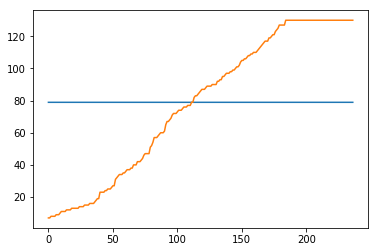

In [14]:
testset = Dataset_Nasa_sorted(dataset=4, train = False)
loader_test = DataLoader(testset, batch_size = 237)

check_accuracy_part34(loader_test,model, print_graph = True)

Checking accuracy on test set
RMSE : (44.59)


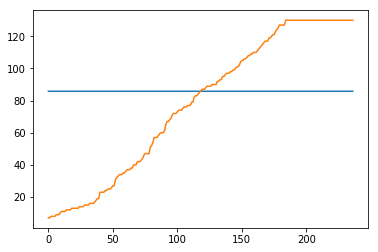

In [20]:
testset = Dataset_Nasa_sorted(dataset=4, train = False)
loader_test = DataLoader(testset, batch_size = 237)

check_accuracy_part34(loader_test,model2, print_graph = True)

In [91]:


model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(9, 1), stride=(1, 1), padding=(4, 0))
  (tanh1): Tanh()
  (conv2): Conv2d(10, 10, kernel_size=(9, 1), stride=(1, 1), padding=(4, 0))
  (tanh2): Tanh()
  (conv3): Conv2d(10, 10, kernel_size=(9, 1), stride=(1, 1), padding=(4, 0))
  (tanh3): Tanh()
  (conv4): Conv2d(10, 10, kernel_size=(9, 1), stride=(1, 1), padding=(4, 0))
  (tanh4): Tanh()
  (conv5): Conv2d(10, 1, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
  (tanh5): Tanh()
  (dropout): Dropout(p=0.5)
  (fc1): Linear(in_features=420, out_features=100, bias=True)
  (tanh_fc1): Tanh()
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

Checking accuracy on test set
RMSE : (45.56)


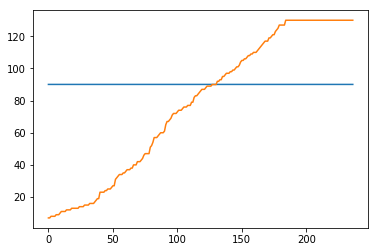

In [80]:
check_accuracy_part34(loader_test,model2, print_graph = True)

# VISUALISATION

In [43]:
import matplotlib as mpl

In [144]:
def visualize_act_map(subset,train,model,datapoint):
    dataset = Dataset_Nasa(dataset = subset, train = train)
    act= {}
    def get_activation(name):
        def hook(model, input, output):
            act[name] = output.detach().squeeze()
        return hook

    model.conv1.register_forward_hook(get_activation('conv1'))
    model.conv2.register_forward_hook(get_activation('conv2'))
    model.conv3.register_forward_hook(get_activation('conv3'))
    model.conv4.register_forward_hook(get_activation('conv4'))
    model.conv5.register_forward_hook(get_activation('conv5'))
    data = torch.from_numpy(dataset[datapoint][0]).view(-1,1,30,14)
    output = model(data.to(dtype = torch.float32), torch.tanh)

    ax = []
    rows = 4
    columns = 5
    fig = plt.figure(figsize=(13,20))
    for i in range(rows):
        for j in range(columns):
            ax.append( fig.add_subplot(rows+1, columns, i*columns + j+1) )
            ax[-1].set_title("layer : "+str(i+1) + ", act_map : "+str(j+1)+"   ")  # set title
            plt.imshow(act["conv"+str(i+1)][j], alpha=1)
    ax.append( fig.add_subplot(rows+1, columns, (columns)*(rows)+1) )
    ax[-1].set_title("layer : "+str(5))  # set title
    plt.imshow(act5, alpha=1)
    plt.show()

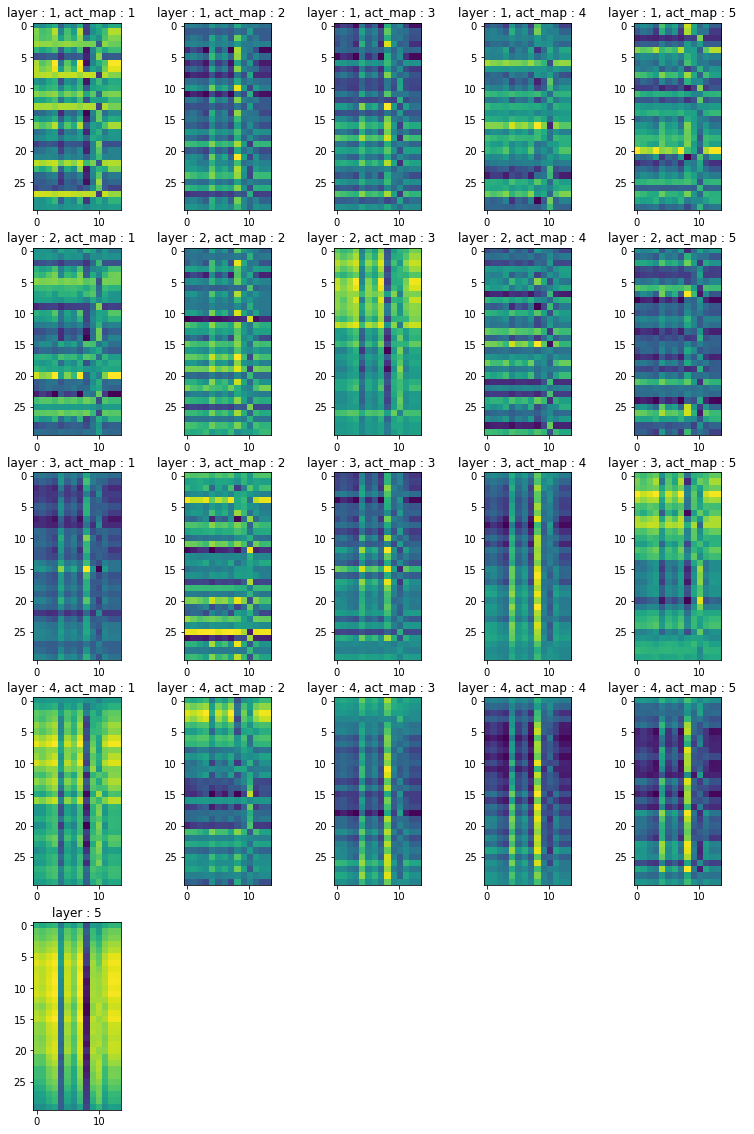

In [145]:
visualize_act_map(4,True,model,0)

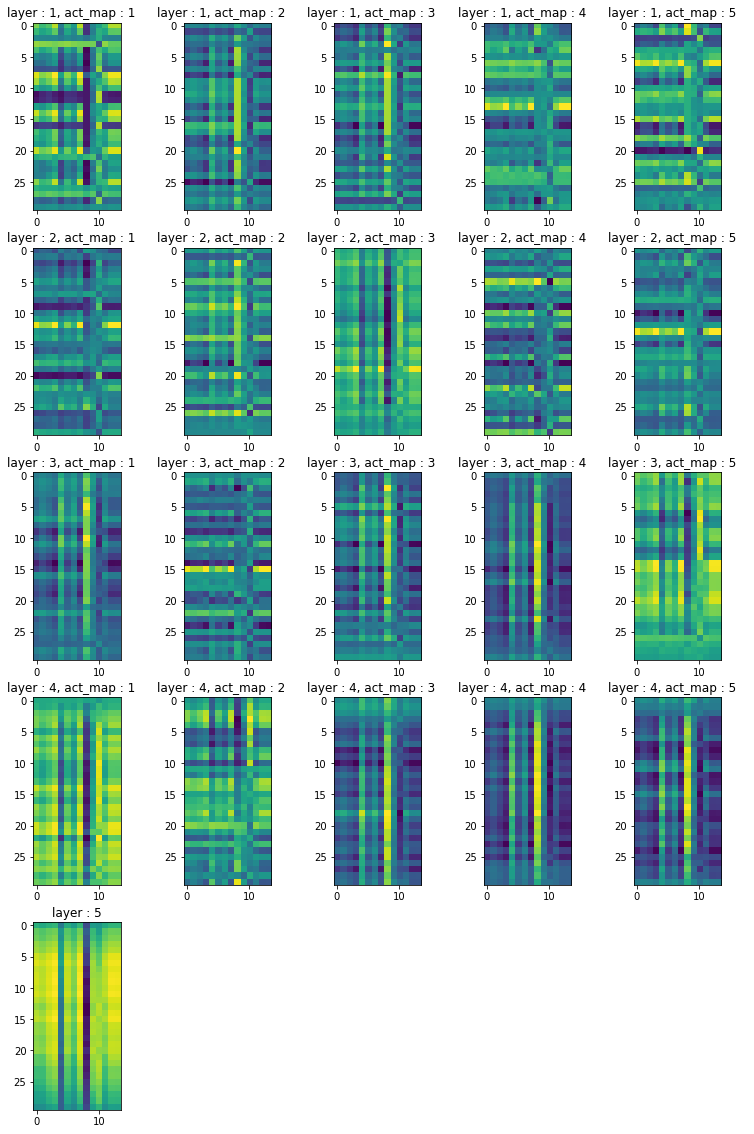

In [147]:
visualize_act_map(4,True,model,25428)

In [10]:
import torchviz

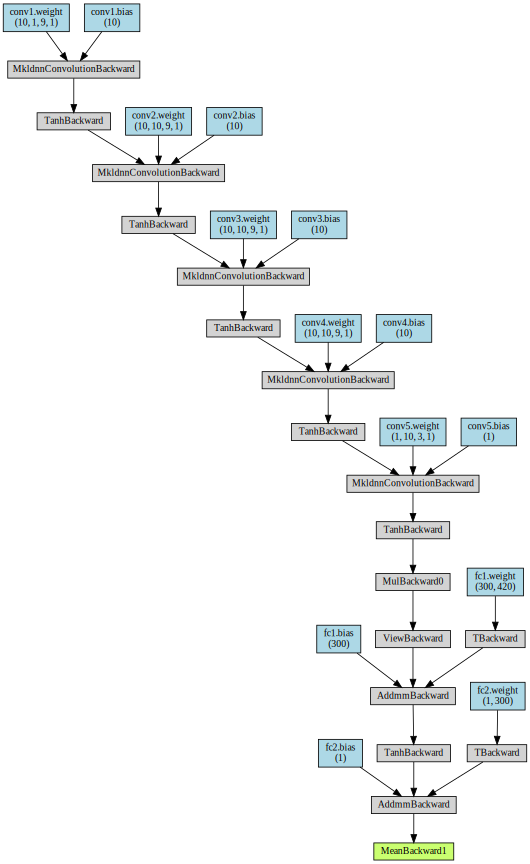

In [25]:
torchviz.make_dot(scores.mean(), params = dict(model.named_parameters()))

In [20]:
for t,(x,y) in enumerate(loader_train):
    if t == 0:
        scores = model(x.to(dtype = torch.float32),torch.tanh)

In [24]:
scores.mean()

tensor(0.0182, grad_fn=<MeanBackward1>)

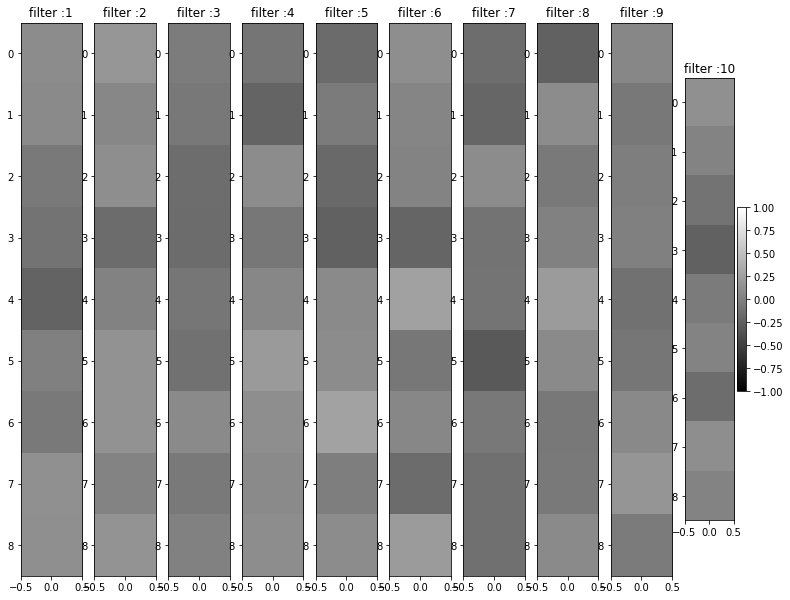

In [75]:
weight = model2.conv1.weight.data.numpy()
ax = []
fig = plt.figure(figsize=(13,20))
for i in range(10):
    ax.append( fig.add_subplot(1, 10, i+1 ))
    ax[-1].set_title("filter :" + str(i+1))  # set title
    plt.imshow(weight[i,0,:,0].reshape((9,1)), alpha=1, cmap = 'gray')
    plt.clim(-1,1)
plt.colorbar()
plt.show()

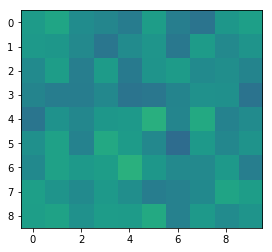

In [59]:
weight = model2.conv1.weight.data.numpy()
plt.imshow(np.transpose(weight[:,0,:,0]))
plt.clim(-1,1)

In [37]:
np.transpose(weight[:,0,:,0])

array([[ 0.09740643,  0.17966294, -0.02543954, -0.08193123, -0.15933485,
         0.11537838, -0.14356507, -0.22874054,  0.06209346,  0.12633929],
       [ 0.0845773 ,  0.05571526, -0.05681024, -0.21373051, -0.03176747,
         0.04640854, -0.19880219,  0.09428868, -0.06155206,  0.03830964],
       [-0.04442822,  0.11592517, -0.14599283,  0.0949572 , -0.17621042,
         0.03331942,  0.09771118, -0.0421591 , -0.01334458, -0.09501428],
       [-0.10132872, -0.15387808, -0.15325716, -0.06986605, -0.23182385,
        -0.20326237, -0.0942376 ,  0.01456986,  0.00715247, -0.24051215],
       [-0.22486487,  0.0193847 , -0.07378097,  0.06123836,  0.07908197,
         0.26342475, -0.08704087,  0.21618183, -0.11620453, -0.03385497],
       [ 0.00037714,  0.144289  , -0.11674106,  0.20323607,  0.0939142 ,
        -0.06752326, -0.29121634,  0.08017575, -0.07721939,  0.0290978 ],
       [-0.05331061,  0.14142138,  0.08302159,  0.11078306,  0.2696197 ,
         0.05968662, -0.0617102 , -0.05833146

In [38]:
weight[0,0,:,0].reshape((9,1))

array([[ 0.09740643],
       [ 0.0845773 ],
       [-0.04442822],
       [-0.10132872],
       [-0.22486487],
       [ 0.00037714],
       [-0.05331061],
       [ 0.12612885],
       [ 0.1242245 ]], dtype=float32)

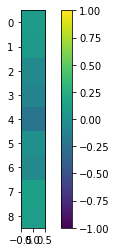

In [57]:
plt.imshow(weight[0,0,:,0].reshape((9,1)))
plt.clim(-1,1)
plt.colorbar()

In [21]:
model.conv1.weight

Parameter containing:
tensor([[[[-0.0374],
          [ 0.1342],
          [ 0.1953],
          [ 0.1453],
          [ 0.2231],
          [-0.1587],
          [ 0.0900],
          [ 0.0047],
          [ 0.2048]]],


        [[[ 0.1610],
          [-0.0558],
          [ 0.0301],
          [ 0.0499],
          [-0.0369],
          [ 0.2936],
          [-0.0106],
          [ 0.0292],
          [-0.1966]]],


        [[[-0.1643],
          [-0.0603],
          [-0.0479],
          [-0.0718],
          [ 0.0172],
          [ 0.0918],
          [ 0.1390],
          [-0.2032],
          [ 0.0583]]],


        [[[-0.3341],
          [ 0.1008],
          [ 0.0328],
          [-0.0408],
          [ 0.0165],
          [ 0.1507],
          [ 0.1741],
          [-0.1025],
          [-0.0970]]],


        [[[-0.1296],
          [-0.1173],
          [-0.1264],
          [ 0.1360],
          [ 0.0076],
          [ 0.0254],
          [-0.1075],
          [-0.0741],
          [-0.1371]]],


        [[[ 0

# Classif ?

In [103]:
class CNN_classif(nn.Module):
    def __init__(self, window_size =9, dropout_ratio = 0.5, initialization='xavier', hidden_neurons=100, activation = 'tanh'):
        
        super().__init__()
        
        #self.activ = torch.relu if activation == "relu" else torch.tanh
        init = nn.init.kaiming_normal_ if initialization=="kaiming" else nn.init.xavier_normal_
        
        self.conv1 = nn.Conv2d(1,10,kernel_size=(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh1 = nn.Tanh()
        init(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0)
        
        self.conv2 = nn.Conv2d(10,10,kernel_size=(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh2 = nn.Tanh()
        init(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0)
        
        self.conv3 = nn.Conv2d(10,10,(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh3 = nn.Tanh()
        init(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.conv4 = nn.Conv2d(10,10,(window_size,1),padding = ((window_size-1)//2,0))
        self.tanh4 = nn.Tanh()
        init(self.conv4.weight)
        nn.init.constant_(self.conv4.bias, 0)
        
        self.conv5 = nn.Conv2d(10,1,(3,1),padding = (1,0))
        self.tanh5 = nn.Tanh()
        init(self.conv5.weight)
        nn.init.constant_(self.conv5.bias, 0)
        
        self.dropout = nn.Dropout(p=dropout_ratio)
        
        self.fc1 = nn.Linear(in_features = 420, out_features = hidden_neurons)
        self.tanh_fc1 = nn.Tanh()
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0)
        
        self.fc2 = nn.Linear(in_features = hidden_neurons, out_features = 131)
        #self.tanh_fc2 = nn.Tanh()
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0)
        
    def forward(self,x):
        tanh1 = self.tanh1(self.conv1(x))
        tanh2 = self.tanh2(self.conv2(tanh1))
        tanh3 = self.tanh3(self.conv3(tanh2))
        tanh4 = self.tanh4(self.conv4(tanh3))
        tanh5 = self.tanh5(self.conv5(tanh4))
        dropout1 = self.dropout(tanh5)
        x_reshape = dropout1.view(-1,30*14)
        tanh6 = self.tanh_fc1(self.fc1(x_reshape))
        predict = self.fc2(tanh6)
        #print(predict)
        return predict

In [108]:
def train_model_classif(model, optimizer,loader_train, loader_val = None, epochs = 1,USE_GPU = True,print_every = 10):
    
    if USE_GPU and torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
    model = model.to(device = device)
    hold_loss = []
    
    dtype = torch.float32 # we will be using float throughout this tutorial
    
    
    for e,epoch in enumerate(range(epochs)):
        cum_loss = 0
       # if e%10 == 0 and e>0:
        #    for param_group in optimizer.param_groups:
         #       param_group['lr']*=0.1
        print('Epoch %d,    lr %f' % (e,optimizer.param_groups[0]['lr']))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)            
            scores = model(x)
            loss = nn.functional.cross_entropy(scores,y)
            cum_loss += loss.data
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss))
                if loader_val:
                    check_accuracy_classif(loader_val, model, device)
                print()
        hold_loss.append(cum_loss/(t+1))
    plt.figure()
    plt.plot(np.array(hold_loss))

In [124]:
def check_accuracy_classif(loader, model, device = torch.device('cpu'), print_graph = False):
    dtype = torch.float32
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    model.eval()  # set model to evaluation mode
    num_correct = 0
    num_samples = 0
    loss = 0
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct)/num_samples
        print('Got : %d / %d correct  (%.2f)' %(num_correct, num_samples, 100*acc))
        if print_graph:
            plt.scatter(range(len(preds)),np.array(preds))
            plt.plot(np.array(y))
            plt.show()

Epoch 0,    lr 0.001000
Iteration 0, loss = 4.9681
Checking accuracy on validation set
Got : 29 / 2701 correct  (1.07)

Iteration 10, loss = 3.7901
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 20, loss = 3.6702
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 30, loss = 3.8064
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 40, loss = 3.5320
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 50, loss = 3.4508
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 60, loss = 3.6138
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 70, loss = 3.4227
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 80, loss = 3.8138
Checking accuracy on validation set
Got : 1087 / 2701 correct  (40.24)

Iteration 90, loss = 3.4758
Checking accuracy on validation set
Got : 1087 / 270

Got : 1100 / 2701 correct  (40.73)

Iteration 40, loss = 3.1290
Checking accuracy on validation set
Got : 1095 / 2701 correct  (40.54)

Iteration 50, loss = 3.3686
Checking accuracy on validation set
Got : 1099 / 2701 correct  (40.69)

Iteration 60, loss = 3.3293
Checking accuracy on validation set
Got : 1099 / 2701 correct  (40.69)

Iteration 70, loss = 3.0401
Checking accuracy on validation set
Got : 1101 / 2701 correct  (40.76)

Iteration 80, loss = 3.2182
Checking accuracy on validation set
Got : 1103 / 2701 correct  (40.84)

Iteration 90, loss = 3.3089
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 100, loss = 2.8949
Checking accuracy on validation set
Got : 1096 / 2701 correct  (40.58)

Epoch 8,    lr 0.001000
Iteration 0, loss = 3.3377
Checking accuracy on validation set
Got : 1097 / 2701 correct  (40.61)

Iteration 10, loss = 3.2365
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 20, loss = 3.3067
Checking acc

Iteration 70, loss = 3.2046
Checking accuracy on validation set
Got : 1102 / 2701 correct  (40.80)

Iteration 80, loss = 3.2073
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 90, loss = 3.1612
Checking accuracy on validation set
Got : 1093 / 2701 correct  (40.47)

Iteration 100, loss = 3.1109
Checking accuracy on validation set
Got : 1099 / 2701 correct  (40.69)

Epoch 15,    lr 0.001000
Iteration 0, loss = 3.1560
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 10, loss = 3.2253
Checking accuracy on validation set
Got : 1104 / 2701 correct  (40.87)

Iteration 20, loss = 3.0645
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 30, loss = 3.1771
Checking accuracy on validation set
Got : 1101 / 2701 correct  (40.76)

Iteration 40, loss = 3.1606
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 50, loss = 3.3608
Checking accuracy on validation set
Got : 1099 

Got : 1104 / 2701 correct  (40.87)

Epoch 22,    lr 0.001000
Iteration 0, loss = 3.0925
Checking accuracy on validation set
Got : 1103 / 2701 correct  (40.84)

Iteration 10, loss = 3.1436
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 20, loss = 3.2595
Checking accuracy on validation set
Got : 1094 / 2701 correct  (40.50)

Iteration 30, loss = 3.2320
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 40, loss = 3.1657
Checking accuracy on validation set
Got : 1097 / 2701 correct  (40.61)

Iteration 50, loss = 3.1101
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 60, loss = 3.0800
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 70, loss = 3.3541
Checking accuracy on validation set
Got : 1103 / 2701 correct  (40.84)

Iteration 80, loss = 3.1808
Checking accuracy on validation set
Got : 1099 / 2701 correct  (40.69)

Iteration 90, loss = 3.1391
Checking acc

Got : 1102 / 2701 correct  (40.80)

Iteration 30, loss = 3.0854
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 40, loss = 3.3555
Checking accuracy on validation set
Got : 1101 / 2701 correct  (40.76)

Iteration 50, loss = 3.1447
Checking accuracy on validation set
Got : 1103 / 2701 correct  (40.84)

Iteration 60, loss = 3.0352
Checking accuracy on validation set
Got : 1099 / 2701 correct  (40.69)

Iteration 70, loss = 2.9668
Checking accuracy on validation set
Got : 1098 / 2701 correct  (40.65)

Iteration 80, loss = 3.0966
Checking accuracy on validation set
Got : 1100 / 2701 correct  (40.73)

Iteration 90, loss = 3.2092
Checking accuracy on validation set
Got : 1097 / 2701 correct  (40.61)

Iteration 100, loss = 3.3499
Checking accuracy on validation set
Got : 1097 / 2701 correct  (40.61)



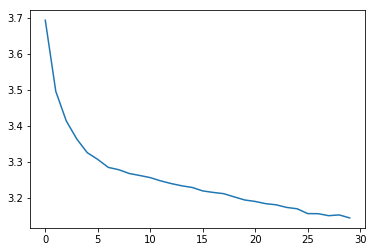

In [109]:
trainsets = pkl.load(open("Datasets/NASA C-MAPSS/trainsets.p","rb"))
testsets = pkl.load(open("Datasets/NASA C-MAPSS/testsets.p","rb"))

train, val = get_train_valid_loader(data = 4)
model = CNN_classif()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model_classif(model,optimizer, train, loader_val = val, epochs = 30)

Epoch 0,    lr 0.001000
Iteration 0, loss = 4.9248

Iteration 10, loss = 4.4440

Iteration 20, loss = 3.0681

Iteration 30, loss = 3.2403

Iteration 40, loss = 3.5203

Iteration 50, loss = 4.4029

Iteration 60, loss = 3.5852

Iteration 70, loss = 3.2946

Iteration 80, loss = 3.8635

Iteration 90, loss = 3.7579

Iteration 100, loss = 4.2880

Epoch 1,    lr 0.001000
Iteration 0, loss = 2.6539

Iteration 10, loss = 4.3025

Iteration 20, loss = 2.9852

Iteration 30, loss = 3.1771

Iteration 40, loss = 3.4853

Iteration 50, loss = 4.3441

Iteration 60, loss = 3.5614

Iteration 70, loss = 3.2298

Iteration 80, loss = 3.7862

Iteration 90, loss = 3.6826

Iteration 100, loss = 4.2575

Epoch 2,    lr 0.001000
Iteration 0, loss = 2.6256

Iteration 10, loss = 4.3032

Iteration 20, loss = 2.9320

Iteration 30, loss = 3.1001

Iteration 40, loss = 3.4163

Iteration 50, loss = 4.2611

Iteration 60, loss = 3.4719

Iteration 70, loss = 3.1667

Iteration 80, loss = 3.7737

Iteration 90, loss = 3.6296

I

Iteration 100, loss = 4.2912

Epoch 24,    lr 0.001000
Iteration 0, loss = 2.4737

Iteration 10, loss = 3.8576

Iteration 20, loss = 2.7413

Iteration 30, loss = 2.9901

Iteration 40, loss = 3.2338

Iteration 50, loss = 3.8862

Iteration 60, loss = 3.2414

Iteration 70, loss = 3.1514

Iteration 80, loss = 3.6445

Iteration 90, loss = 3.3606

Iteration 100, loss = 4.2944

Epoch 25,    lr 0.001000
Iteration 0, loss = 2.4875

Iteration 10, loss = 3.8909

Iteration 20, loss = 2.7502

Iteration 30, loss = 3.0334

Iteration 40, loss = 3.1902

Iteration 50, loss = 3.8750

Iteration 60, loss = 3.2350

Iteration 70, loss = 3.1663

Iteration 80, loss = 3.6887

Iteration 90, loss = 3.3303

Iteration 100, loss = 4.3040

Epoch 26,    lr 0.001000
Iteration 0, loss = 2.5063

Iteration 10, loss = 3.8708

Iteration 20, loss = 2.7405

Iteration 30, loss = 2.9991

Iteration 40, loss = 3.2186

Iteration 50, loss = 3.8737

Iteration 60, loss = 3.2174

Iteration 70, loss = 3.1630

Iteration 80, loss = 3.650

Iteration 80, loss = 3.6580

Iteration 90, loss = 3.2131

Iteration 100, loss = 4.1999

Epoch 48,    lr 0.001000
Iteration 0, loss = 2.4105

Iteration 10, loss = 3.7664

Iteration 20, loss = 2.6261

Iteration 30, loss = 2.9543

Iteration 40, loss = 3.1149

Iteration 50, loss = 3.8211

Iteration 60, loss = 3.1307

Iteration 70, loss = 3.0884

Iteration 80, loss = 3.6679

Iteration 90, loss = 3.2070

Iteration 100, loss = 4.2215

Epoch 49,    lr 0.001000
Iteration 0, loss = 2.4374

Iteration 10, loss = 3.7366

Iteration 20, loss = 2.6058

Iteration 30, loss = 2.9478

Iteration 40, loss = 3.1196

Iteration 50, loss = 3.7883

Iteration 60, loss = 3.1251

Iteration 70, loss = 3.1143

Iteration 80, loss = 3.6674

Iteration 90, loss = 3.2107

Iteration 100, loss = 4.1392

Epoch 50,    lr 0.001000
Iteration 0, loss = 2.4097

Iteration 10, loss = 3.7631

Iteration 20, loss = 2.5721

Iteration 30, loss = 2.9613

Iteration 40, loss = 3.1103

Iteration 50, loss = 3.8070

Iteration 60, loss = 3.114

Iteration 60, loss = 3.0220

Iteration 70, loss = 3.0833

Iteration 80, loss = 3.5831

Iteration 90, loss = 3.1227

Iteration 100, loss = 4.0514

Epoch 72,    lr 0.001000
Iteration 0, loss = 2.3519

Iteration 10, loss = 3.6648

Iteration 20, loss = 2.4927

Iteration 30, loss = 2.8382

Iteration 40, loss = 3.0323

Iteration 50, loss = 3.7621

Iteration 60, loss = 3.0216

Iteration 70, loss = 3.1175

Iteration 80, loss = 3.6442

Iteration 90, loss = 3.0583

Iteration 100, loss = 4.0479

Epoch 73,    lr 0.001000
Iteration 0, loss = 2.2932

Iteration 10, loss = 3.6106

Iteration 20, loss = 2.4613

Iteration 30, loss = 2.8118

Iteration 40, loss = 3.0712

Iteration 50, loss = 3.7657

Iteration 60, loss = 3.0201

Iteration 70, loss = 3.0915

Iteration 80, loss = 3.5466

Iteration 90, loss = 3.1035

Iteration 100, loss = 4.0426

Epoch 74,    lr 0.001000
Iteration 0, loss = 2.3196

Iteration 10, loss = 3.6713

Iteration 20, loss = 2.4894

Iteration 30, loss = 2.8025

Iteration 40, loss = 3.082

Iteration 40, loss = 2.9657

Iteration 50, loss = 3.7337

Iteration 60, loss = 2.8964

Iteration 70, loss = 3.0106

Iteration 80, loss = 3.5183

Iteration 90, loss = 3.0485

Iteration 100, loss = 3.8314

Epoch 96,    lr 0.001000
Iteration 0, loss = 2.2969

Iteration 10, loss = 3.5384

Iteration 20, loss = 2.3915

Iteration 30, loss = 2.7182

Iteration 40, loss = 2.9874

Iteration 50, loss = 3.7235

Iteration 60, loss = 2.9203

Iteration 70, loss = 3.0380

Iteration 80, loss = 3.4799

Iteration 90, loss = 2.9953

Iteration 100, loss = 3.8411

Epoch 97,    lr 0.001000
Iteration 0, loss = 2.3084

Iteration 10, loss = 3.5329

Iteration 20, loss = 2.4235

Iteration 30, loss = 2.6462

Iteration 40, loss = 2.9487

Iteration 50, loss = 3.7226

Iteration 60, loss = 2.9619

Iteration 70, loss = 3.0751

Iteration 80, loss = 3.4609

Iteration 90, loss = 2.9952

Iteration 100, loss = 3.8168

Epoch 98,    lr 0.001000
Iteration 0, loss = 2.3089

Iteration 10, loss = 3.5500

Iteration 20, loss = 2.389

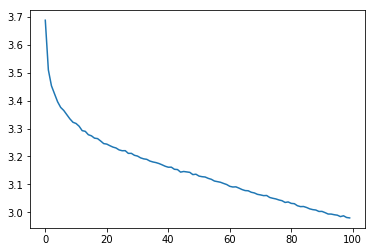

In [113]:
trainset = Dataset_Nasa(dataset=4, train = True)
loader_train = DataLoader(trainset, batch_size = 512)
model = CNN_classif()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_model_classif(model,optimizer, loader_train, epochs = 100)

Checking accuracy on test set
Got : 25 / 237 correct  (10.55)


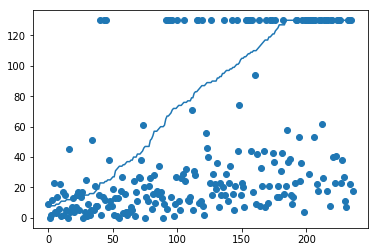

In [126]:
check_accuracy_classif(loader_test,model, print_graph = True)